<a href="https://colab.research.google.com/github/egemenokte/ForFun/blob/main/PRNG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Middle-Square Algorithm

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(rc = {'figure.figsize':(10,10)},font_scale = 2)

class middlesquare(): #1949 talk, Von Neumann

    ## Generate one random seed given the previous seed
    def generate(self,seed):
        l=self.l #determine the length of the seed
        strt_idx = ((2*l) // 2) - (l // 2) #start index of the seed
        end_idx = ((2*l) // 2) + (l // 2)+1 #end index of the seed for odd numbers
        if l%2 == 0: #if even, subtract 1 from end index
            end_idx-=1
        seed = int(str(seed * seed).zfill(2*l)[strt_idx:end_idx]) #take the square and take the middle l digits
        return seed
    
    ## generate N*N random numbers
    def generateN(self,seed,N):
        self.seed0=seed; self.l=len(str(seed)) #save the length and seed to self
        nums=[] #create empty list of numbers
        repeat=0 #have any number repeated?
        for i in range(N*N): #generate N*N numbers
            seed=self.generate(seed) #generate a new seed
            self.seed=seed #update the seed value
            newnum=seed/(10**self.l-1) #random number between 0-1 is seed/highest l-1 digit number
            if newnum in nums and repeat==0: #if a number repeats
                print('Repeat at ',i) #record the repeat
                repeat=i
            nums.append(newnum) #append number to the sequence of numbers
        nums=np.reshape(nums,[N,N]) #reshape as a square for easier plot
        return nums,repeat

Let's generate numbers

In [ ]:
##Generate Numbers
seed=39943095 #initial seed (interesting seeds = 281981,631157,27428742,993166,399430952)
N=100 #N^2 numbers will be generated
## Create middle square object
rng=middlesquare()
nums,repeat=rng.generateN(seed,N)
## Plot the random numbers in a heatmap
plt.figure()
sns.heatmap(np.round(nums),square=True,cbar=False,xticklabels=False, yticklabels=False)
plt.title('Middle-Square, seed= '+str(seed) +'. Repeats after '+str(repeat))
plt.xlabel('First '+str(N*N)+' numbers in the sequence.')

# Linear Congruential Generator

In [20]:
class lincongen(): #1958 by W. E. Thomson and A. Rotenberg

    #generates the next seed given the previous
    def generate(self,seed):
        seed=(self.a*seed+self.b)%self.m # (a*seed+b)%m
        return seed    

    #generate N*N numbers in a sequence
    def generateN(self,seed,N):
        self.a=25214903917; self.b=11; self.m=2**48 #define a,b and m
        self.seed0=seed; self.l=len(str(seed)) #save the seed and length to self
        nums=[] #create empty list of numbers
        repeat=0 #have any number repeated?
        for i in range(N*N):  #generate N*N numbers
            seed=self.generate(seed) #generate a new seed
            self.seed=seed #update the seed value
            newnum=seed/(self.m) #random number between 0-1 is seed/m
            if newnum in nums and repeat==0: #if a number repeats
                print('Repeat at ',i) #record the repeat
                repeat=i
            nums.append(newnum) #append number to the sequence of numbers
        nums=np.reshape(nums,[N,N]) #reshape as a square for easier plot
        return nums,repeat 

Let's generate numbers

In [ ]:
seed=39943095 #initial seed (interesting seeds = 281981,631157,27428742,993166,399430952)
N=100 #N^2 numbers will be generated
## Create lin.cong. gen. object
rng2=lincongen()
nums,repeat=rng2.generateN(seed,N)
## Plot the random numbers in a heatmap
plt.figure()
sns.heatmap(np.round(nums),square=True,cbar=False,xticklabels=False, yticklabels=False)
plt.title('Lin. Cong. Gen. , seed= '+str(seed) +'. Repeats after '+str(repeat))
plt.xlabel('First '+str(N*N)+' numbers in the sequence.')

# Inverse Sampling

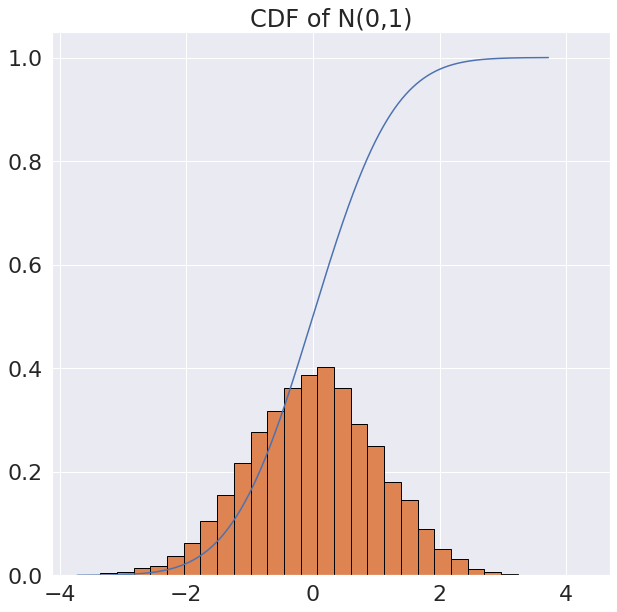

In [29]:
## Generate samples from a normal distribution (mean zero, std one) given uniform samples
from scipy.stats import norm
normalsamples=norm.ppf(nums.flatten()); #get the number from the inverse CDF of the normal dist
## Plot the CDF and the histogram
#plt.figure()
#plt.hist(nums.flatten(),15,density=True,edgecolor = "black")
#plt.title('PDF of U(0,1)')
plt.figure()
y=np.arange(0.0001,1,0.0001);
plt.plot(norm.ppf(y),y)
plt.title('CDF of N(0,1)')
plt.hist(normalsamples,30,density=True,edgecolor = "black");